4.5.1
[[ 16  17  15 ... 156 158 161]
 [ 20  14  14 ... 155 156 158]
 [ 17  18  10 ... 153 152 156]
 ...
 [ 12   6   7 ... 148 148 149]
 [  5   6   4 ... 148 148 148]
 [  3   2   3 ... 146 148 149]]
25


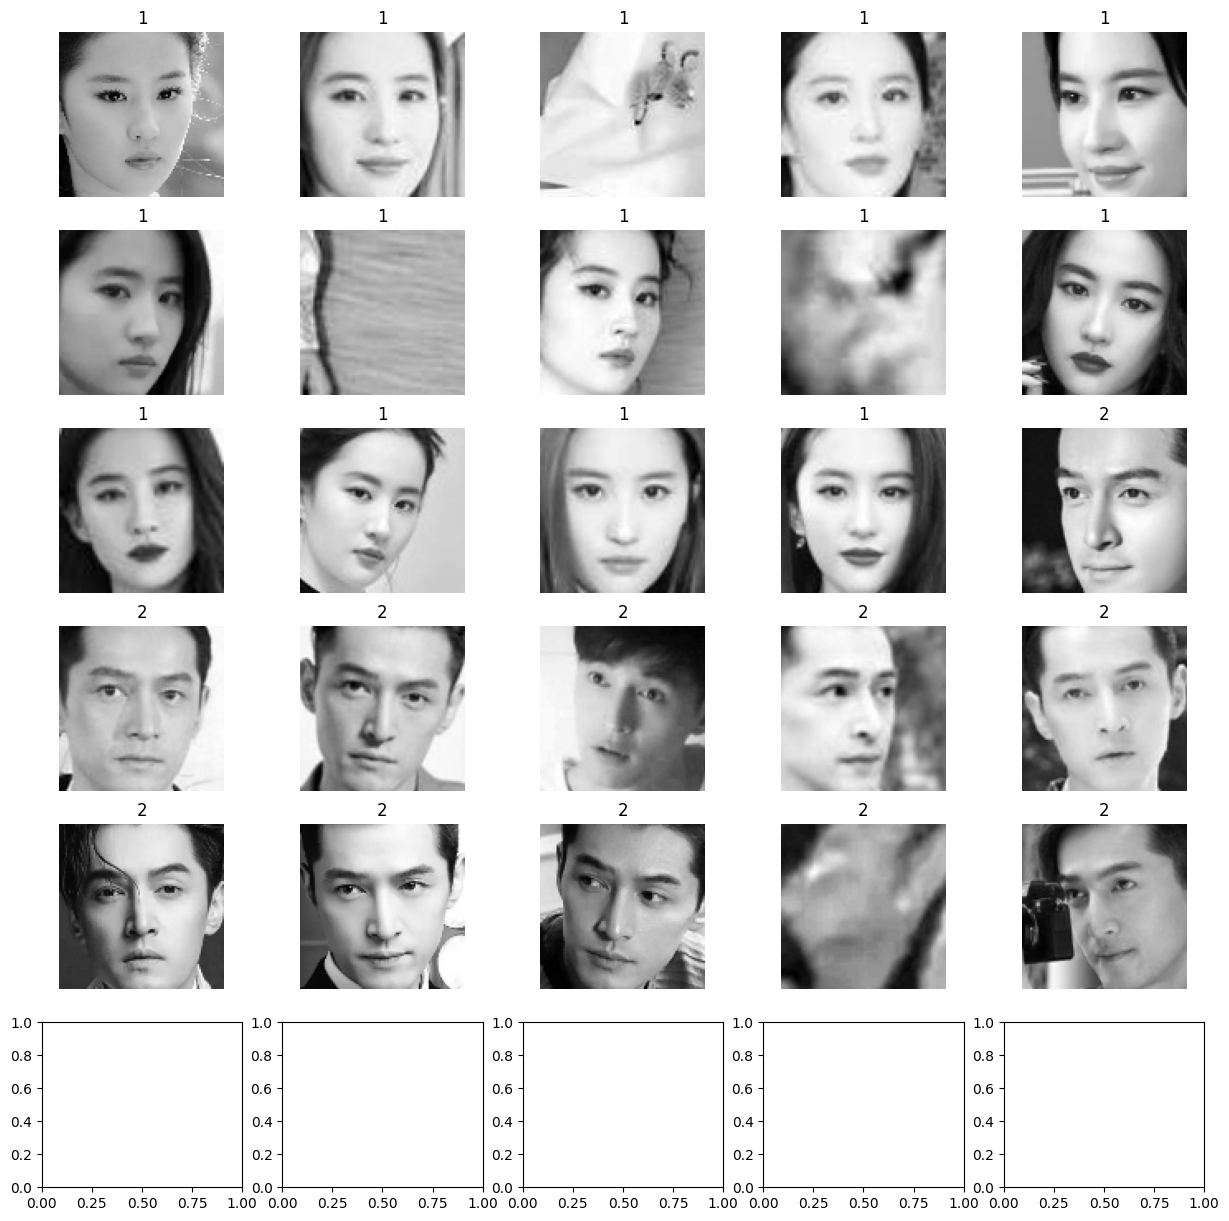

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
print(cv2.__version__)

# 设置数据集路径
data_dir = './images'
xml_dir = "D:/condaenv/tensorflowcpu/Library/etc/haarcascades/"
face_cascade = cv2.CascadeClassifier(xml_dir + 'haarcascade_frontalface_alt2.xml')

# 获取所有子目录名称
label_names = os.listdir(data_dir)

# 初始化图像和标签列表
images = []
labels = []
image_shapoe=(100,100)
# 遍历每个子目录
for label_name in label_names:
    # 构造子目录路径
    label_dir = os.path.join(data_dir, label_name)
    # 获取当前子目录下所有图片文件路径
    image_paths = [os.path.join(label_dir, f) for f in os.listdir(label_dir)]
    # 遍历每张图片
    for image_path in image_paths:
        # 使用OpenCV加载图片
        #image = cv2.imread(image_path)
        # 将图片转换为灰度图像
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        imageByte=Image.open(image_path).convert("L")
        gray=np.array(imageByte,'uint8')
        faces = face_cascade.detectMultiScale(gray)
        for (x, y, w, h) in faces:
            faceImage=gray[y:y+h, x:x+w]
            #转换成统一的人脸大小
            destImage=cv2.resize(faceImage,image_shapoe)
            images.append(destImage)
            #注意label只能是数字    
            labels.append(int(label_name))
print(images[0])
print(len(labels))
# 定义子图数量和排列方式
num_images = 25#len(images)
num_cols = 5
num_rows = num_images // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
for i, (image, label) in enumerate(zip(images, labels)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

In [20]:
#训练图片
# 创建 LBPH 人脸识别器对象
recognizer = cv2.face.LBPHFaceRecognizer_create()
# 训练人脸数据
labels=np.array(labels)

recognizer.train(images, labels)
modelPath='./face_recognizer.yml'
if os.path.exists(modelPath):
    os.remove(modelPath)
recognizer.save(modelPath)

In [21]:
# 加载人脸数据集
face_data = cv2.face.LBPHFaceRecognizer_create()
face_data.read('face_recognizer.yml')
def face_detect(img):
    # 加载人脸模型
    xml_dir = "D:/condaenv/tensorflowcpu/Library/etc/haarcascades/"
    # 加载人脸检测器

    face_cascade = cv2.CascadeClassifier(xml_dir + 'haarcascade_frontalface_alt2.xml')
    # 转换为灰度图像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 检测人脸
    faces = face_cascade.detectMultiScale(gray)
    # 在图像中框出人脸
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face_roi = gray[y:y+h, x:x+w]
         #转换成统一的人脸大小
        face_roi=cv2.resize(face_roi,image_shapoe)
        label, confidence = face_data.predict(face_roi)
        fontFace = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (0, 255, 0)
        thickness = 2
        lineType = cv2.LINE_AA
        name="lyf"
        name="lyf" if label==1 else "hg"
        cv2.putText(img, name, (x, y), fontFace, fontScale, color, thickness, lineType)
        # print('Label: {}, Confidence: {}'.format(label, confidence))
    cv2.imshow("xj",img)
cap=cv2.VideoCapture("./video/hz.mp4")
while True:
    flag,frame=cap.read()
    if not flag:
        break;
    face_detect(frame)
    # 等待按下 q 键退出
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()